In [2]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import matplotlib.lines as mlines
import numpy as np
from micropyome.taxa import regression

In [12]:
def graph(results: dict, title: str):
    def smooth_curve(x, y):
        x_new = np.linspace(min(x), max(x), 300)
        spline = make_interp_spline(x, y, k=3)
        y_smooth = spline(x_new)
        return x_new, y_smooth

    plt.figure(figsize=(14, 7))

    # Define line styles and markers for each model
    line_styles = {
        'Random Forest': '--',       # Dashed line
        'Gradient Boosting': ':',    # Dotted line
        'Decision Tree': ":",
        'Averill et al. 2021': '-.',       # Dash-dot line
        'Logit': '--',
        "k-NN": "-",
        'MLP': "-"
    }
    markers = {
        'Random Forest': 's',        # Square point
        'Gradient Boosting': 'o',    # Round point
        'Decision Tree': '^',
        'Averill et al. 2021': '^',       # Triangle point
        'Logit': 'o',
        "k-NN": "D",
        'MLP': "x"
    }

    # Plotting the models from r2_results.csv (lines)
    taxonomic_levels_title_case = ['Phylum', 'Class', 'Order', 'Family', 'Genus']
    for model in results:
        x_values = np.arange(len(taxonomic_levels_title_case))
        y_values = results[model]
        x_smooth, y_smooth = smooth_curve(x_values, y_values)
        plt.plot(x_smooth, y_smooth, line_styles[model], linewidth=1.5, label=model, color='black', zorder=1)

    # Plotting the models (markers on top)
    for model in results:
        y_values = results[model]
        marker_color = '0.42' if model in ('Gradient Boosting', 'k-NN') else 'black'
        plt.scatter(x_values, y_values, marker=markers[model], color=marker_color, s=150, zorder=2, linewidth=1.5)  # s controls size

    # Plotting the compared study (lines and markers)
    # y_values_compared = r2_results_compared_study_df.loc['Averill et al. method', regression.TAXONOMIC_LEVELS]
    # x_smooth, y_smooth = smooth_curve(x_values, y_values_compared)
    # plt.plot(x_smooth, y_smooth, line_styles['Averill et al. 2021'], linewidth=1.5, label='Averill et al. 2021', color='black', zorder=1)
    # plt.scatter(x_values, y_values_compared, marker=markers['Averill et al. 2021'], color='black', s=150, zorder=2, linewidth=1.5)

    # Create custom legend handles with increased marker and line sizes
    legend_handles = []
    for model in results:
        marker_color = '0.42' if model in ('Gradient Boosting', 'k-NN') else 'black'
        line = mlines.Line2D([], [], color='black', marker=markers[model],
                             linestyle=line_styles[model], markersize=15,  # Increase marker size
                             markeredgewidth=1, markerfacecolor=marker_color,
                             label=model, linewidth=1.5)  # Increase line width
        legend_handles.append(line)

    # Convert taxonomic level names to title case for x-axis labels
    #taxonomic_levels_title_case = [level.title() for level in taxonomic_levels]
    #taxonomic_levels_title_case = ['Functional group', 'Phylum', 'Class', 'Order', 'Family', 'Genus']

    plt.xticks(x_values, taxonomic_levels_title_case, fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('Taxonomic Level', fontsize=18)
    plt.ylabel(r'$R^2$ score', fontsize=18)
    plt.title(title, fontsize=20, pad=18)
    plt.legend(handles=legend_handles, loc='best', fontsize=16)
    plt.savefig("D:/stage/img.eps")
    plt.show()

# Bacteria

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


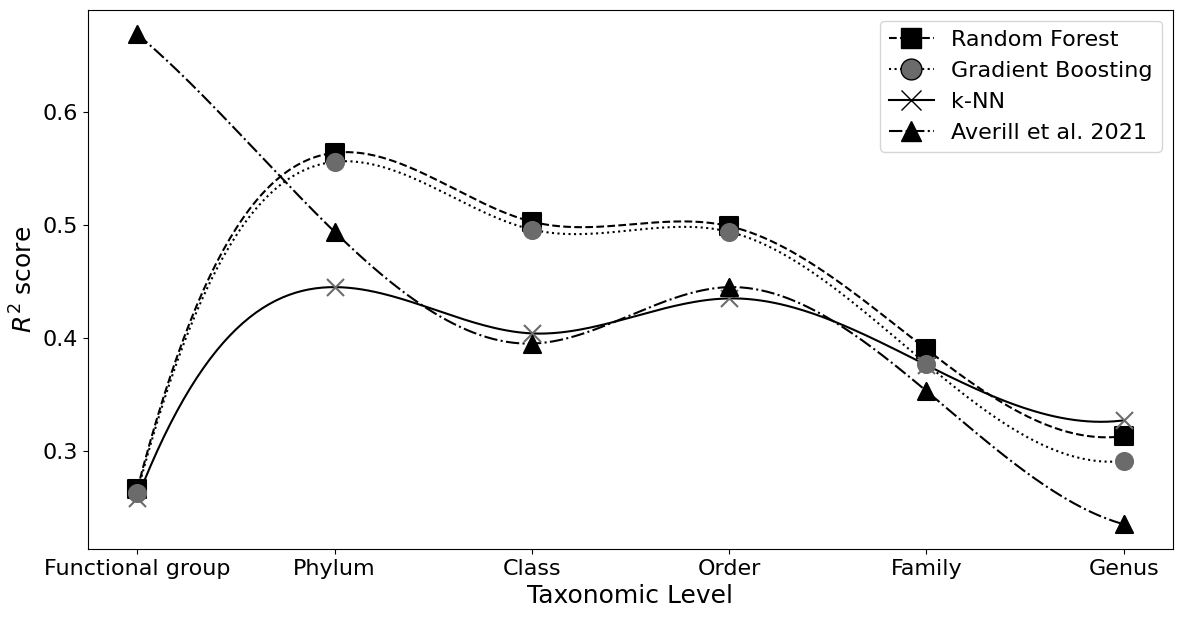

In [11]:
RESULTS = {
    # "Logit": [0.205, 0.219, 0.176, 0.138, 0.057, 0.021],
    # "Decision Tree": [0.189, 0.453, 0.424, 0.416, 0.301, 0.169],
    "Random Forest": [0.266, 0.564, 0.503, 0.499, 0.390, 0.313],
    "Gradient Boosting": [0.263, 0.556, 0.496, 0.494, 0.377, 0.291],
    "k-NN": [0.258, 0.445, 0.404, 0.435, 0.376, 0.327],
    "Averill et al. 2021": [0.669, 0.494, 0.395, 0.445, 0.353, 0.235],
}

graph(RESULTS, "")
# graph(RESULTS, r'$R^2$ score comparison across methods for different bacterial taxonomic levels')

# Fungi

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


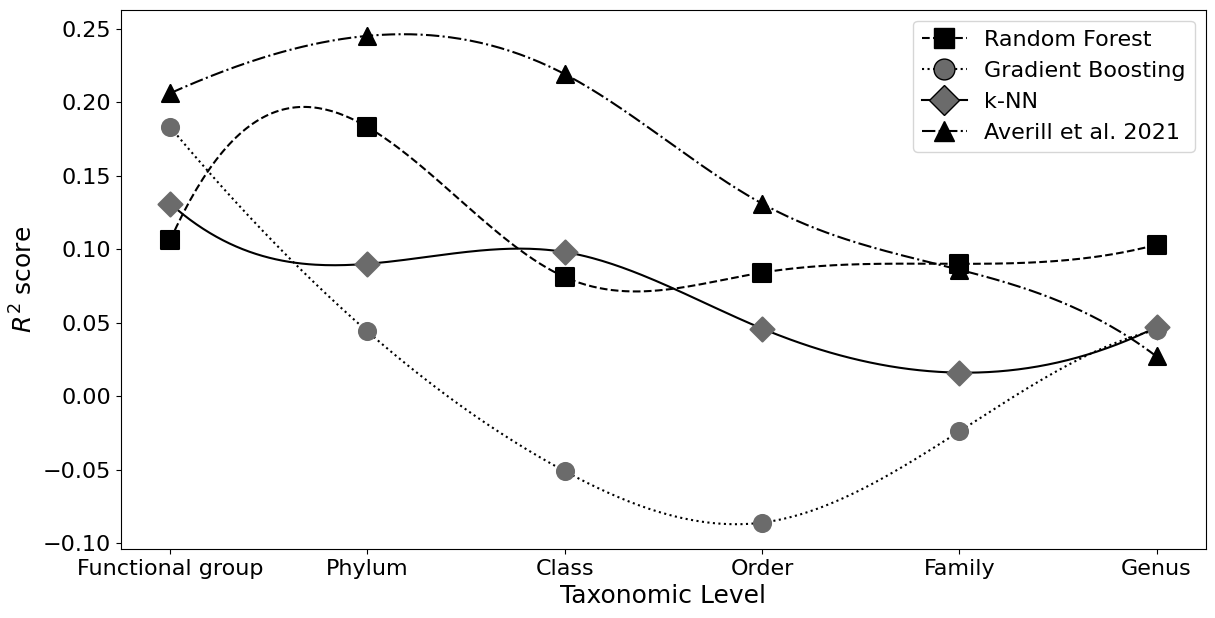

In [14]:
RESULTS = {
    "Random Forest":         [0.106, 0.183, 0.081, 0.084, 0.090, 0.103],
    "Gradient Boosting":     [0.183, 0.044, -0.051, -0.086, -0.024, 0.045],
    "k-NN":                  [0.131, 0.090, 0.098, 0.046, 0.016, 0.047],
    "Averill et al. 2021":   [0.206, 0.245, 0.219, 0.131, 0.086, 0.027]
}

graph(RESULTS, '')

# NEON

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


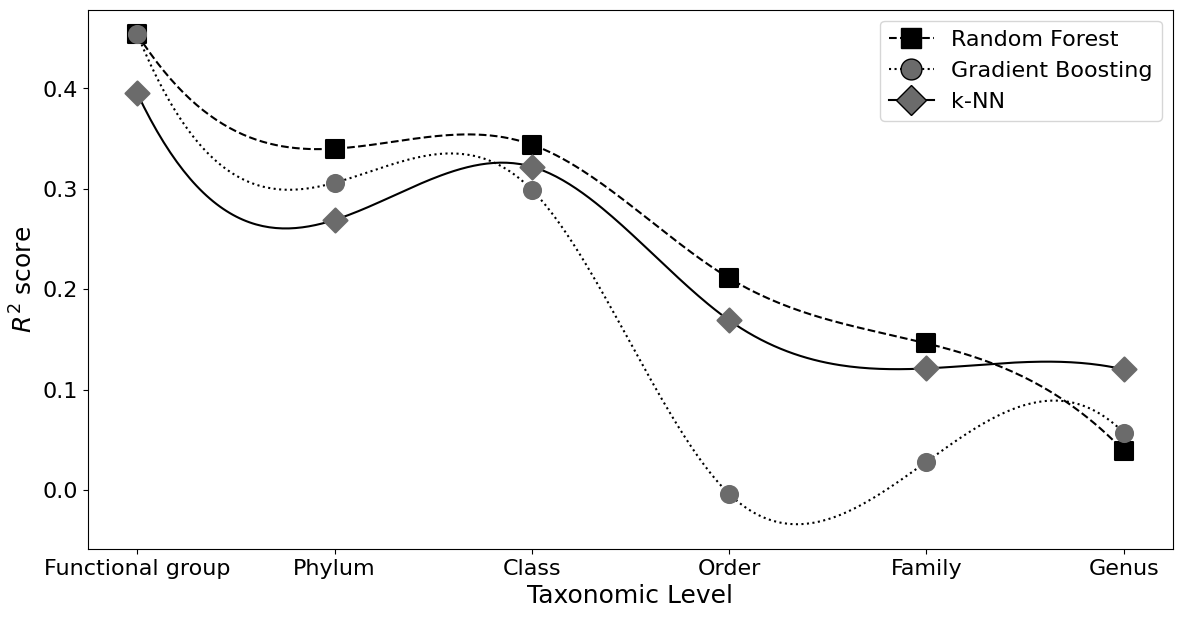

In [18]:
RESULTS = {
    #"Logit regression": [0.279, 0.252, 0.271, 0.128, 0.039, -0.038],
    #"Decision tree": [0.349, 0.281, 0.304, 0.040, 0.054, -0.290],
    "Random Forest": [0.454, 0.340, 0.344, 0.211, 0.146, 0.039],
    "Gradient Boosting": [0.454, 0.306, 0.299, -0.004, 0.028, 0.057],
    "k-NN": [0.395, 0.269, 0.322, 0.169, 0.121, 0.120]
}

graph(RESULTS, '')

## Fungi, Raw

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


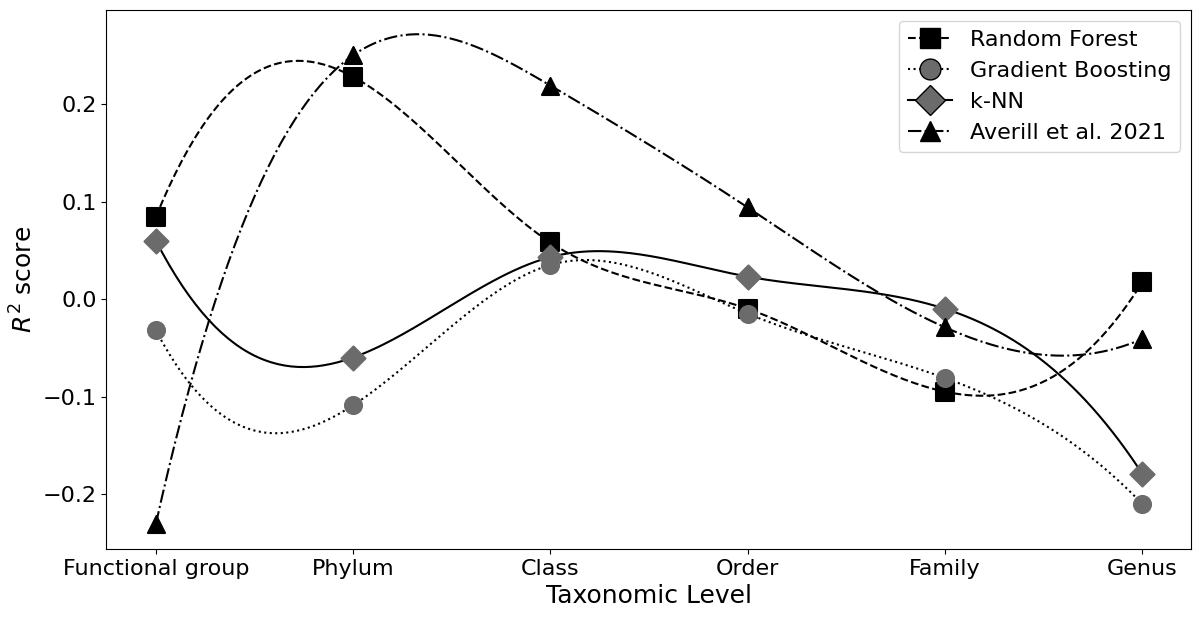

In [6]:
RESULTS = {
    #"Logit regression": [0.009, -0.233, -0.189, -0.175, -0.277, -0.191],
    #"Decision tree": [-3.318, -0.813, -1.247, -1.792, -1.352, -5.030],
    "Random Forest": [0.084, 0.228, 0.058, -0.010, -0.095, 0.017],
    "Gradient Boosting": [-0.032, -0.109, 0.035, -0.015, -0.081, -0.210],
    "k-NN": [0.060, -0.060, 0.043, 0.023, -0.010, -0.179],
    "Averill et al. 2021": [-0.231, 0.250, 0.219, 0.094, -0.029, -0.041]
}

graph(RESULTS, '')

## NEON bacteria, Filtered

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


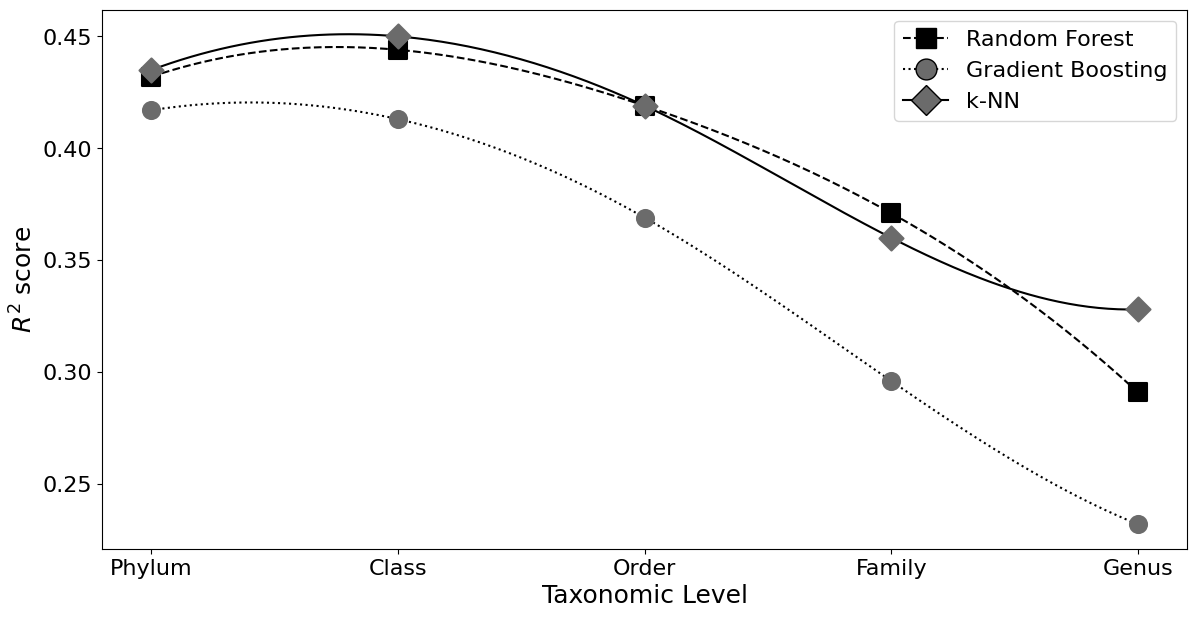

In [13]:
RESULTS = {
    "Random Forest": [0.432, 0.444, 0.419, 0.371, 0.291],
    "Gradient Boosting": [0.417, 0.413, 0.369, 0.296, 0.232],
    "k-NN": [0.435, 0.450, 0.419, 0.360, 0.328]
}

graph(RESULTS, '')

# NEON fungi, filtered

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


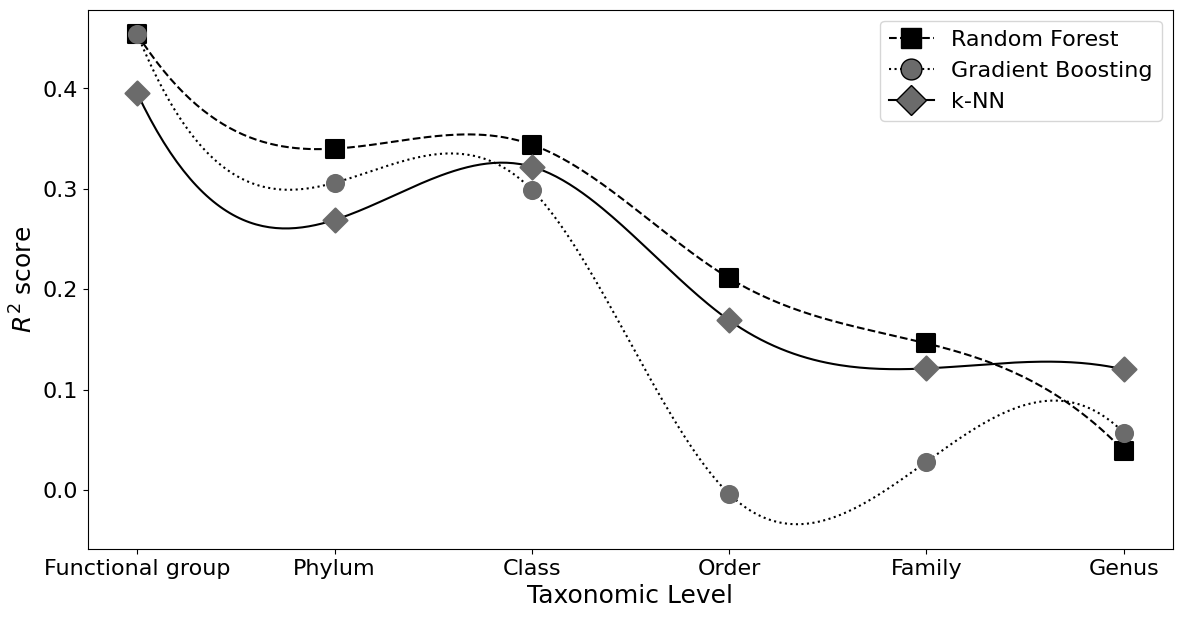

In [7]:
RESULTS = {
    #"Linear regression": [0.384,0.291, 0.283, 0.165, 0.095, 0.113],
    #"Logit regression": [0.279, 0.252, 0.271, 0.128, 0.039, -0.038],
    #"Decision tree": [0.349, 0.281, 0.304, 0.040, 0.054, -0.290],
    "Random Forest": [0.454, 0.340, 0.344, 0.211, 0.146, 0.039],
    "Gradient Boosting": [0.454, 0.306, 0.299, -0.004, 0.028, 0.057],
    "k-NN": [0.395, 0.269, 0.322, 0.169, 0.121, 0.120],
}

graph(RESULTS, '')